# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Rounding and Truncation Error Analysis

Euler's number $e$ can be represented as the infinite series $e = \sum_{n=0}^{\infty} \frac{1}{n!}$. In order to evaluate it in Python we need to truncate the series. Furthermore, we learned that every number representation and floating-point operation introduces a finite error. Thus, let's analyze the truncated series 

$$\tilde{e} = \sum_{n=0}^{N} \frac{1}{n!}$$ 

in more detail.

import numpy as np
import scipy.special
from matplotlib import pyplot as plt

### Task 1

Calculate $\tilde{e}$ with Python and plot the relative error $ \delta = \left| \frac{\tilde{e} - e}{e} \right|$ as a function of $N$ (use a log-scale for the $y$ axis).

In [3]:
import numpy as np
import scipy.special
from matplotlib import pyplot as plt

In [4]:
def getEuler0(N):
    """
    Return the estimate for Euler's number truncated after N iterations using a loop.
    """
    
    # Implicitly initialize eApprox as a float
    eApprox = 0.
    
    for n in range(N + 1):
        eApprox += 1 / np.math.factorial(n)
    
    return eApprox

def getEuler1(N):
    """
    Return the estimate for Euler's number truncated after N iterations vectorization.
    """
    
    n = np.arange(N + 1)
    
    # Only scipy seems to accept arrays as input to factorial.
    eApprox = np.sum(1 / scipy.special.factorial(n))
    
    return eApprox

# Set getEuler to the fast implementation.
getEuler = getEuler1

def getEulerErr(eApprox):
    """Return relative error to Numpy provided value for Euler's number."""
    
    delta = abs( (eApprox - np.e) / np.e )
    
    return delta

In [5]:
# It really does seem that the loop in getEuler0 is terribly slow:
%timeit -n10 getEuler0(2000)
%timeit -n10 getEuler1(2000)

76.2 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.5 µs ± 6.91 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


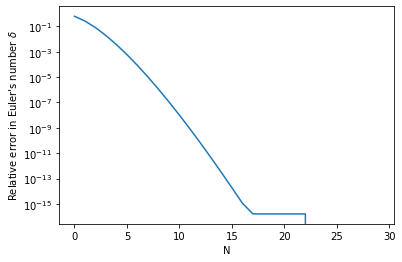

In [6]:
x         = np.arange(30)
eulers    = np.array([getEuler(N) for N in x])
eulerErrs = getEulerErr(eulers)

plt.figure()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Relative error in Euler's number $\delta$")
plt.plot(x, eulerErrs)
plt.show()

In [7]:
"""Check that getEuler and getEulerErr return the correct output for several inputs"""
assert np.allclose(getEuler(0), 1)
assert np.allclose(getEuler(1), 2)
assert np.allclose(getEuler(2), 2.5)
assert np.allclose(getEuler(10), np.e)

assert np.allclose(getEulerErr(0), 1, rtol=1e-16)
assert np.allclose(getEulerErr(np.e), 0)

### Task 2 

Compare the relative errors $\delta$ for different floating point precisions as a function of $N$. To this end, we define each element of the series $e_n = \frac{1}{n!}$ and convert it to double-precision (64 bit) and single-precision (32 bit) floating points **before** adding them up. This can be done by using Numpy's functions $\text{numpy.float64(e_n)}$ and $\text{numpy.float32(e_n)}$, respectively.

In [8]:
def getEulerSinglePrecision(N):
    n   = np.arange(N + 1)
    e_n = 1 / scipy.special.factorial(n)
    
    eApprox = np.sum(np.float32(e_n))
    
    return eApprox

def getEulerDoublePrecision(N):
    n   = np.arange(N + 1)
    e_n = 1 / scipy.special.factorial(n)
    
    eApprox = np.sum(np.float64(e_n))
    
    return eApprox

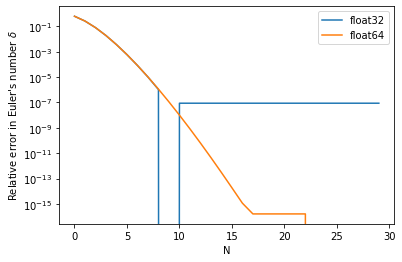

In [9]:
x           = np.arange(30)
eulerErrs32 = getEulerErr(np.array([getEulerSinglePrecision(N) for N in x]))
eulerErrs64 = getEulerErr(np.array([getEulerDoublePrecision(N) for N in x]))

plt.figure()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Relative error in Euler's number $\delta$")
plt.plot(x, eulerErrs32)
plt.plot(x, eulerErrs64)
plt.legend(["float32", "float64"])
plt.show()

In [10]:
"""Check that getEulerSinglePrecision and getEulerDoublePrecision return the correct output for several inputs"""
assert np.allclose(getEulerSinglePrecision(0), 1)
assert np.allclose(getEulerSinglePrecision(1), 2)
assert np.allclose(getEulerSinglePrecision(2), 2.5)
assert np.allclose(getEulerSinglePrecision(10), np.e)

assert np.allclose(getEulerDoublePrecision(0), 1)
assert np.allclose(getEulerDoublePrecision(1), 2)
assert np.allclose(getEulerDoublePrecision(2), 2.5)
assert np.allclose(getEulerDoublePrecision(10), np.e)

eeAppr_32bit = getEulerSinglePrecision(50)
eeAppr_64bit = getEulerDoublePrecision(50)
assert getEulerErr(eeAppr_32bit) > getEulerErr(eeAppr_64bit)

### Task 3

Compare the relative errors $\delta$ for different rounding accuracies as a function of $N$. Use Python's $\text{round(e_n, d)}$ function, where $d$ is the number of returned digits, to round each $e_n$ element before adding them up. Plot $\delta$ vs. $N$ for $d = 1,2,3,4,5$ and add a corresponding legend.

In [11]:
def getEulerRounding(N, d):
    n   = np.arange(N + 1)
    e_n = 1 / scipy.special.factorial(n)
    
    # Instead of Python's standard round function, we use numpy.round, 
    # as it can handle numpy.arrays and is further the same.
    eApprox = np.sum(np.round(e_n, d))
    
    return eApprox

In [12]:
d_list      = np.arange(1, 5)
x           = np.arange(30)
eulerErrs   = [getEulerErr(np.array([getEulerRounding(N, d) for N in x])) for d in d_list]

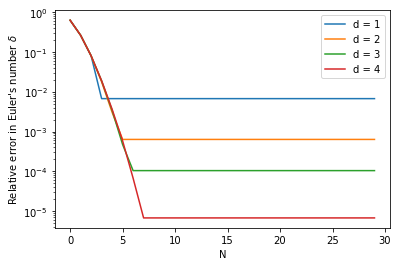

In [13]:
plt.figure()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Relative error in Euler's number $\delta$")
for errs in eulerErrs:
    plt.plot(x, errs)
plt.legend(["d = " + str(d) for d in d_list])
plt.show()

In [14]:
"""Check that getEulerRounding returns the correct output for several inputs"""
assert np.allclose(getEulerRounding(0,3), 1)
assert np.allclose(getEulerRounding(1,5), 2)
assert np.allclose(getEulerRounding(2,6), 2.5)
assert np.allclose(getEulerRounding(10,2), np.e, rtol=1e-3)
assert np.allclose(getEulerRounding(10,6), np.e, rtol=1e-5)

eeAppr_4d = getEulerRounding(50, 4)
eeAppr_8d = getEulerRounding(50, 8)
assert getEulerErr(eeAppr_4d) > getEulerErr(eeAppr_8d)

### Some examples
```python
import numpy as np

# using float32
a = 0.1234
b = np.float32(a)

# using round
c = round(a, 2)
```